In [1]:
import numpy as np
import matplotlib.pylab as plt
from Tutorial.filter_butterworth import butter_bandpass_filter
from Tutorial.Dataset import load_scg

In [2]:
data_true_train = np.load('../Data/RealData/all_back_train.npy')
data_true_test = np.load('../Data/RealData/all_back_test.npy')
signals_true_train, signals_true_test = data_true_train[:, :1000], data_true_test[:, :1000]
labels_true_train, labels_true_test = data_true_train[:, 1000:], data_true_test[:, 1000:]
data_true_train.shape, data_true_test.shape

((4672, 1006), (1655, 1006))

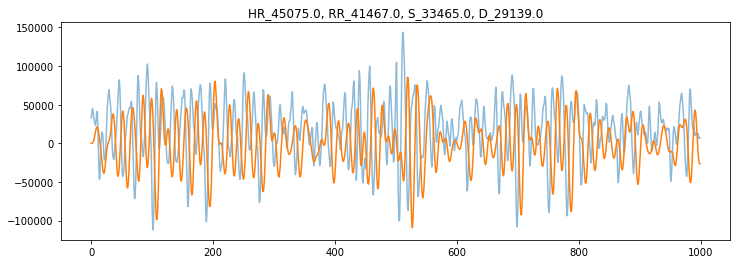

In [3]:
for i in range(20):
    plt.figure(figsize=(12, 4))
    plt.plot(signals_true_test[i], alpha=0.5)
    filtered_signal = butter_bandpass_filter(signals_true_test[i], 0.7, 8, 100)
    plt.plot(filtered_signal)
    plt.title(f'HR_{signals_true_test[i, 2]}, RR_{signals_true_test[i, 3]}, S_{signals_true_test[i, 4]}, D_{signals_true_test[i, 5]}')
    break

In [4]:
from Tutorial.filter_ma import simple_moving_average_filter
from scipy.signal import find_peaks

# signals_train, labels_train, duration, fs = load_scg(0.1, 'train')
# features_ = []
#
# num = 1000
# cnt = 0
# for i in range(num):
#     if signals_train[i].max() > 1:
#         continue
#     cnt += 1
#     filtered_signal = butter_bandpass_filter(signals_train[i], 0.7, 10, 100)
#
#     filtered_energy = simple_moving_average_filter((filtered_signal* 1e6) **2, 10)
#     peaks, _ = find_peaks(filtered_energy, np.max(filtered_energy) * 0.3, distance=10)
#     feature = np.mean(filtered_energy[peaks])
#     features_.append((feature))
#
#     show = False
#     if show:
#         plt.figure(figsize=(12, 4))
#         plt.plot(signals_train[i]* 1e6, alpha=0.5)
#         plt.plot(filtered_signal * 1e6)
#         plt.plot((filtered_signal* 1e6) **2)
#         plt.plot(filtered_energy)
#         plt.scatter(peaks, filtered_energy[peaks])
#
#     # if i > 10:
#     #     break
# plt.figure()
# plt.scatter(labels_train[:cnt, -2], features_)
#
# plt.figure()
# plt.scatter(labels_train[:cnt, -1], features_)


(995,)
(995,)
(995,)
(995,)
(995,)
(995,)
(995,)
(995,)


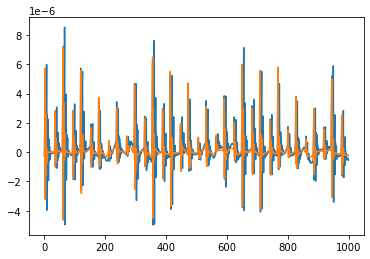

In [5]:
data = np.load('../Data/simu_20000_0.1_90_140_train.npy')
data = np.load('../Data/simu_20000_0.1_90_140_train.npy')
signals_train, labels_train = data[:, :1000], data[:, 1000:]

from Tutorial.add_noises import add_echo
echod_signal = add_echo(signals_train[0], 4, [0.4, 0.3, 0.2, 0.1], [5] * 4)
plt.plot(echod_signal)
plt.plot(signals_train[0])
#
# L = 100
# emp_point=15
# from Code.Tutorial.algo_ssa import SSA
# ssa_ = SSA(echod_signal, L)
# ssa_.plot_wcorr(0, 30)
# plt.show()
#
# plt.subplots(2, 1, figsize=(20, 8))
# plt.subplot(2, 1, 1)
# ssa_.orig_TS.plot(alpha=0.3, label='Noisy Signal')
# ssa_.reconstruct(slice(0, emp_point)).plot(label='Trend')
# plt.title('Noisy Signal and its Trend')
# plt.legend()
# plt.subplot(2, 1, 2)
# ssa_.reconstruct(slice(emp_point, L)).plot(label='Denoised Signal')
# ssa_.orig_TS.plot(alpha=0.3, label='Noisy Signal')
# plt.title('Noisy Signal and its Denoised Signal')
# plt.legend()
# plt.show()

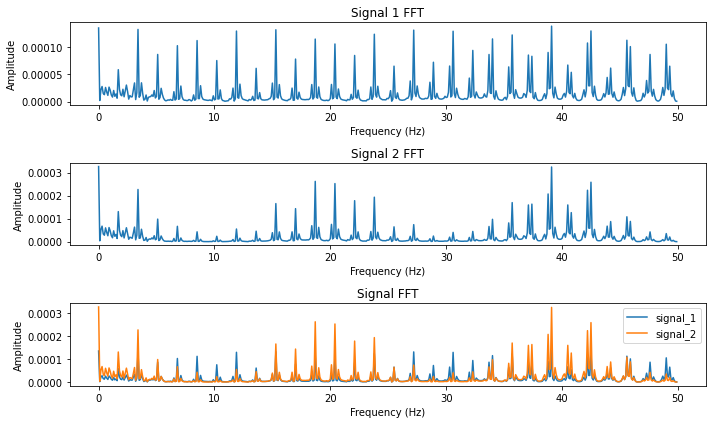

In [6]:
def compare_fft(sign1, sign2, sample_rate=100):
    # 计算信号的FFT
    fft1 = np.fft.fft(sign1)
    fft2 = np.fft.fft(sign2)


    # 计算频率轴
    n = len(sign1)
    freq = np.fft.fftfreq(n, d=1/sample_rate)

    # 仅保留正半轴的频谱
    positive_freq_indices = np.where(freq >= 0)
    positive_freq = freq[positive_freq_indices]
    positive_fft1 = np.abs(fft1[positive_freq_indices])
    positive_fft2 = np.abs(fft2[positive_freq_indices])

    # 绘制FFT结果
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.title("Signal 1 FFT")
    plt.plot(positive_freq, np.abs(positive_fft1))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.title("Signal 2 FFT")
    plt.plot(positive_freq, np.abs(positive_fft2))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 3)
    plt.title("Signal FFT")
    plt.plot(positive_freq, np.abs(positive_fft1), label='signal_1')
    plt.plot(positive_freq, np.abs(positive_fft2), label='signal_2')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_fft(signals_train[0], echod_signal, sample_rate=100)
# plt.plot(echod_signal)
# plt.plot()

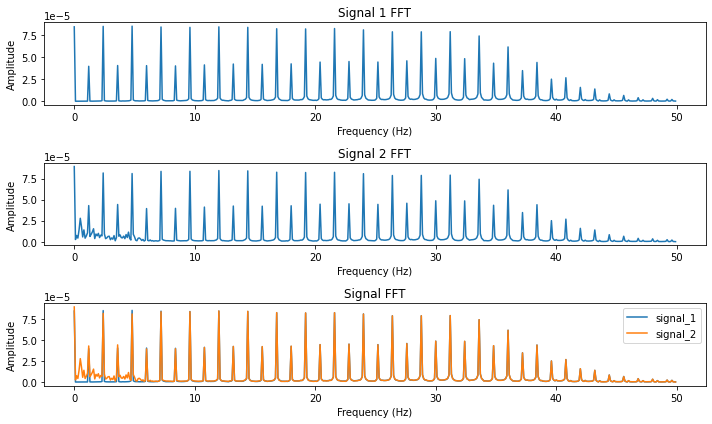

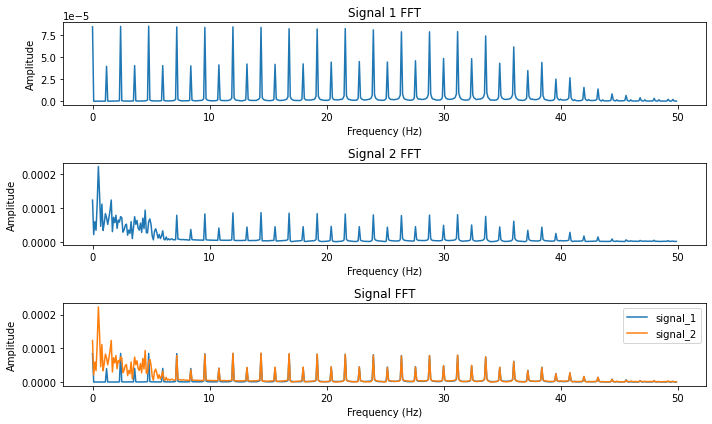

In [7]:
signals_8, labels_8, duration, fs = load_scg(0.8, 'train')
signals_1, labels_1, duration, fs = load_scg(0.1, 'train')
signals_0, labels_0, duration, fs = load_scg(0, 'train')

idx = 13

compare_fft(signals_0[idx], signals_1[idx], sample_rate=100)
compare_fft(signals_0[idx], signals_8[idx], sample_rate=100)

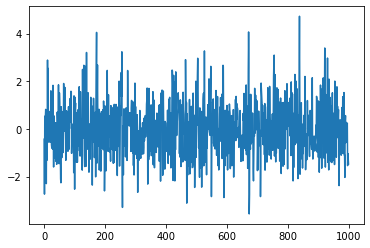

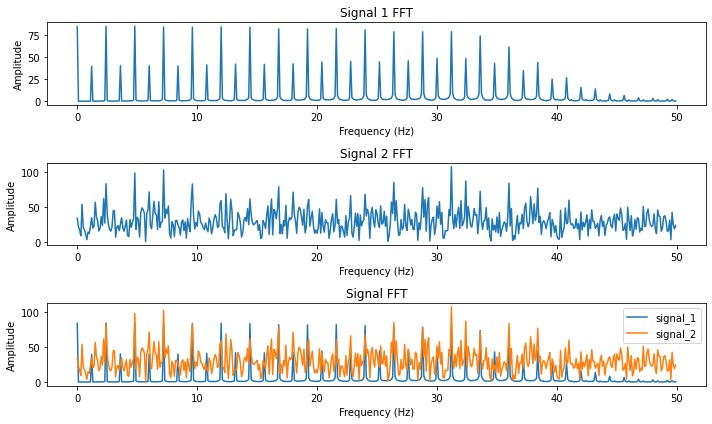

In [73]:
signals_0, labels_0, duration, fs = load_scg(0, 'train')

idx = 13
plt.plot(signals_0[idx]*1e6+np.random.normal(loc=0.0, scale=1, size=signals_0[0].shape))
# plt.plot(signals_0[idx]*1e6)
compare_fft(signals_0[idx]*1e6, signals_0[idx]*1e6+np.random.normal(loc=0.0, scale=1, size=signals_0[0].shape), sample_rate=100)
# compare_fft(signals_0[idx], signals_8[idx], sample_rate=100)

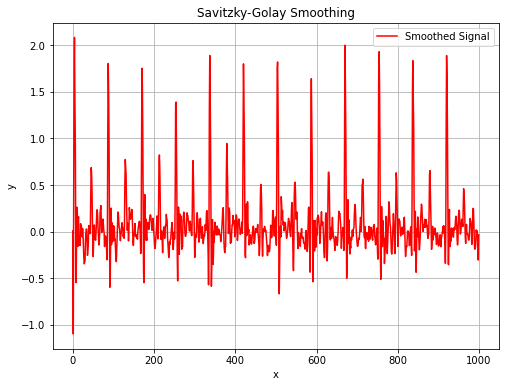

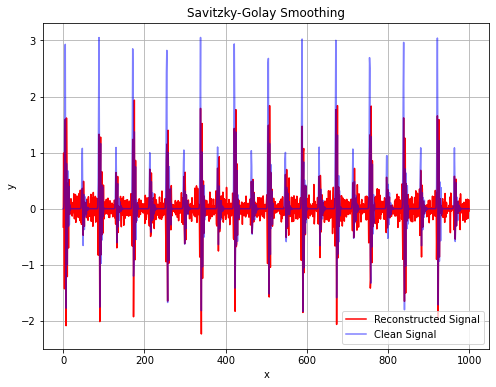

In [9]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 1000, endpoint=False)

x = signals_0[idx] * 1e6
y = x + np.random.normal(0, 0.2, t.shape)
window_length = 11  # Window length for the filter (should be an odd number)
polyorder = 5    # Polynomial order for fitting
y_smoothed = savgol_filter(y, window_length, polyorder)

plt.figure(figsize=(8, 6))
# plt.plot(y, label='Noisy Signal', color='blue', alpha=0.5)
plt.plot(y_smoothed, label='Smoothed Signal', color='red')
plt.legend()
plt.title('Savitzky-Golay Smoothing')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y - y_smoothed, label='Reconstructed Signal', color='red')

plt.plot(x, label='Clean Signal', color='blue', alpha=0.5)
plt.legend()
plt.title('Savitzky-Golay Smoothing')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

2.6207258693294415


C:\Users\86189\AppData\Local\Temp\ipykernel_17816\2553068265.py:40: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_17816\2553068265.py:40: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_17816\2553068265.py:40: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_17816\2553068265.py:40: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_17816\2553068265.py:40: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_17816\2553068265.py:40: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) miss

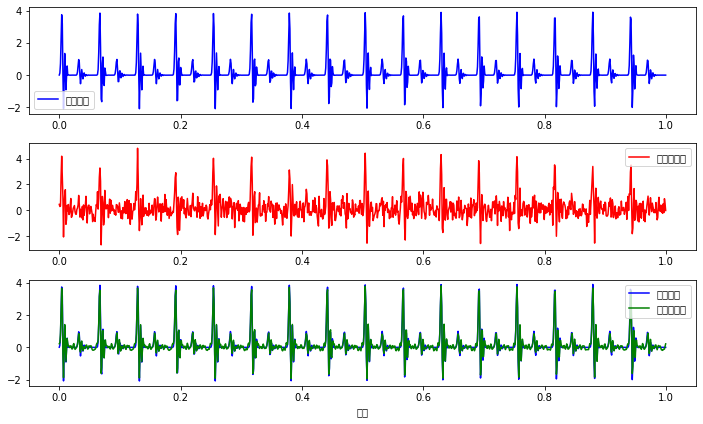

In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000, endpoint=False)
signal = signals_0[0] * 1e6
noise = np.random.normal(0, 0.5, t.shape)  # 高斯噪声
# noise = np.random.laplace(0, 1.5, t.shape)  # 高斯噪声
noisy_signal = signal + noise

# 计算信号和噪声的功率谱密度
signal_power = np.abs(np.fft.fft(signal))**2
noise_power = np.abs(np.fft.fft(noise))**2
noise_power = np.mean(noise_power)
# 估计 Wiener Filter 的频域表示
snr = signal_power / noise_power  # 信噪比

print(np.mean(snr))
wiener_filter = 1 / (1 + 1 / snr)

# 将 Wiener Filter 应用于频域表示
filtered_signal = np.fft.fft(noisy_signal) * wiener_filter

# 对滤波后的信号进行反变换，回到时域
filtered_signal = np.fft.ifft(filtered_signal)

# 绘制原始信号、噪声和滤波后的信号
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='原始信号', color='blue')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label='带噪声信号', color='red')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, signal, label='原始信号', color='blue')
plt.plot(t, np.real(filtered_signal), label='滤波后信号', color='green')
plt.legend()
plt.xlabel('时间')
plt.tight_layout()
plt.show()

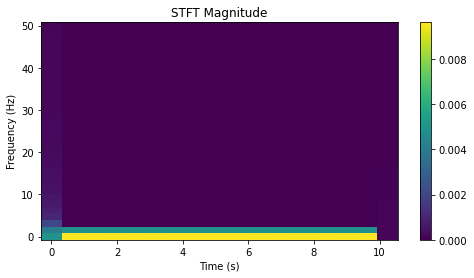

In [52]:
import numpy as np
import scipy.signal

def stft(signal, window_size, hop_size, fs):
    """
    Compute the Short-Time Fourier Transform (STFT) of a signal.

    Parameters:
    - signal: The input signal.
    - window_size: Size of the analysis window (in samples).
    - hop_size: Hop size between successive windows (in samples).
    - fs: Sampling frequency of the signal (in Hz).

    Returns:
    - stft_matrix: The STFT matrix, where each column corresponds to the STFT of a frame.
    - time_instants: The time instants corresponding to the columns of the STFT matrix (in seconds).
    - frequencies: The frequencies corresponding to the rows of the STFT matrix (in Hz).
    """

    # Compute the STFT using scipy.signal.stft
    frequencies, time_instants, stft_matrix = scipy.signal.stft(signal, fs=fs, nperseg=window_size, noverlap=hop_size)

    # Extract time instants and frequencies
    # time_instants = np.arange(0, signal.shape[0] / fs, hop_size / fs)
    # frequencies = np.fft.rfftfreq(window_size, 1.0 / fs)

    return stft_matrix, time_instants, frequencies

# Example usage:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Generate a simple test signal (e.g., a sinusoidal signal)
    fs = 100  # Sampling frequency (Hz)
    t = np.arange(0, 10, 1 / fs)  # Time vector
    # signal = 0.5 * np.sin(2 * np.pi * 4 * t) + 0.2 * np.sin(2 * np.pi * 6 * t)

    idx = 1
    signal_clean = signals_0[idx]
    # plt.plot(signals_0[idx])
    # plt.plot(signals_1[idx])

    # Compute the STFT of the signal
    window_size = 64  # Size of the analysis window (samples)
    hop_size = 0    # Hop size between successive windows (samples)

    stft_matrix_1, time_instants, frequencies = stft(signal_clean, window_size, hop_size, fs)

    # plt.figure(figsize=(8, 4))
    # print(time_instants.shape, frequencies.shape, np.abs(stft_matrix).shape)
    # plt.pcolormesh(time_instants, frequencies, np.abs(stft_matrix))
    # plt.title('STFT Magnitude')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Frequency (Hz)')
    # plt.colorbar()
    # plt.show()

    # signal = signals_1[idx]
    signal = signal_clean + np.random.normal(0, 0.01)
    stft_matrix_2, time_instants, frequencies = stft(signal, window_size, hop_size, fs)

    plt.figure(figsize=(8, 4))
    plt.pcolormesh(time_instants, frequencies, np.abs(np.abs(stft_matrix_1) - np.abs(stft_matrix_2)))
    plt.title('STFT Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.show()

In [15]:
import numpy as np
import scipy.signal

def stft(signal, window_size, hop_size, fs):
    """
    Compute the Short-Time Fourier Transform (STFT) of a signal.

    Parameters:
    - signal: The input signal.
    - window_size: Size of the analysis window (in samples).
    - hop_size: Hop size between successive windows (in samples).
    - fs: Sampling frequency of the signal (in Hz).

    Returns:
    - stft_matrix: The STFT matrix, where each column corresponds to the STFT of a frame.
    - time_instants: The time instants corresponding to the columns of the STFT matrix (in seconds).
    - frequencies: The frequencies corresponding to the rows of the STFT matrix (in Hz).
    """

    # Compute the STFT using scipy.signal.stft
    frequencies, time_instants, stft_matrix = scipy.signal.stft(signal, fs=fs, nperseg=window_size, noverlap=hop_size)

    # Extract time instants and frequencies
    # time_instants = np.arange(0, signal.shape[0] / fs, hop_size / fs)
    # frequencies = np.fft.rfftfreq(window_size, 1.0 / fs)

    return stft_matrix, time_instants, frequencies

# Example usage:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Generate a simple test signal (e.g., a sinusoidal signal)
    fs = 100  # Sampling frequency (Hz)
    t = np.arange(0, 10, 1 / fs)  # Time vector
    # signal = 0.5 * np.sin(2 * np.pi * 4 * t) + 0.2 * np.sin(2 * np.pi * 6 * t)
    signal = 0.5 * np.sin(2 * np.pi * 5 * t)
    plt.plot(signal)
    # Compute the STFT of the signal
    window_size = 64  # Size of the analysis window (samples)
    hop_size = 0    # Hop size between successive windows (samples)

    stft_matrix, time_instants, frequencies = stft(signal, window_size, hop_size, fs)

    plt.figure(figsize=(10, 6))
    print(time_instants.shape, frequencies.shape, np.abs(stft_matrix).shape)
    plt.pcolormesh(time_instants, frequencies, np.abs(stft_matrix))
    plt.title('STFT Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.show()

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                                  +--

C:\Users\86189\AppData\Local\Temp\ipykernel_2772\1403774063.py:32: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_2772\1403774063.py:32: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_2772\1403774063.py:32: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_2772\1403774063.py:32: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_2772\1403774063.py:32: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  plt.tight_layout()
C:\Users\86189\AppData\Local\Temp\ipykernel_2772\1403774063.py:32: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing fr

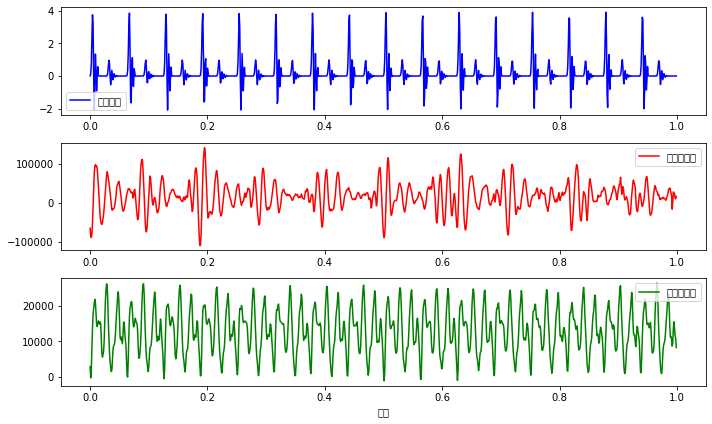

In [83]:
noise = np.random.normal(0, 1.5, t.shape)
# 生成包含信号和噪声的示例数据
t = np.linspace(0, 1, 1000, endpoint=False)
noisy_signal = signals_true_train[0]

# 计算信号和噪声的功率谱密度
signal_power = np.abs(np.fft.fft(signal))**2
noise_power = np.abs(np.fft.fft(noise))**2

# 估计 Wiener Filter 的频域表示
snr = signal_power / noise_power  # 信噪比
wiener_filter = 1 / (1 + 1 / snr)

# 将 Wiener Filter 应用于频域表示
filtered_signal = np.fft.fft(noisy_signal) * wiener_filter

# 对滤波后的信号进行反变换，回到时域
filtered_signal = np.fft.ifft(filtered_signal)

# 绘制原始信号、噪声和滤波后的信号
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='原始信号', color='blue')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, signals_true_train[0], label='带噪声信号', color='red')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, np.real(filtered_signal), label='滤波后信号', color='green')
plt.legend()
plt.xlabel('时间')
plt.tight_layout()
plt.show()

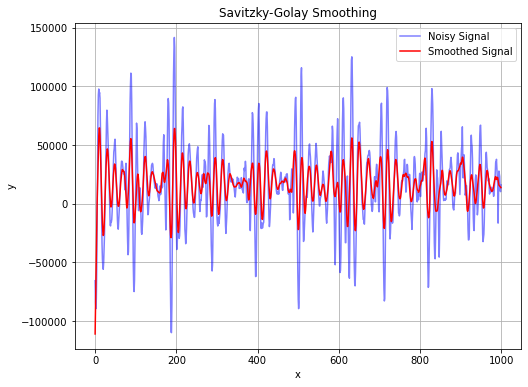

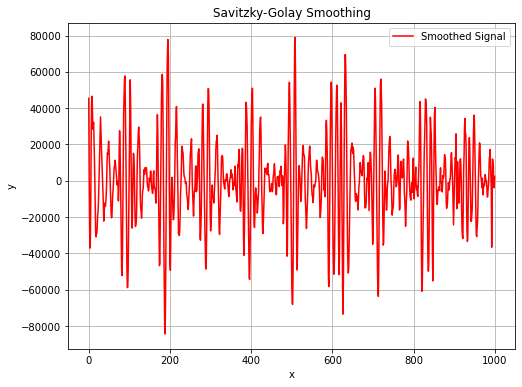

In [79]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

idx = 0
y = signals_true_train[0]
# Apply the Savitzky-Golay filter
window_length = 11  # Window length for the filter (should be an odd number)
polyorder = 1     # Polynomial order for fitting
y_smoothed = savgol_filter(y, window_length, polyorder)

# Plot the original and smoothed signals
plt.figure(figsize=(8, 6))
plt.plot(y, label='Noisy Signal', color='blue', alpha=0.5)
plt.plot(y_smoothed, label='Smoothed Signal', color='red')
plt.legend()
plt.title('Savitzky-Golay Smoothing')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y - y_smoothed, label='Smoothed Signal', color='red')
plt.legend()
plt.title('Savitzky-Golay Smoothing')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()